In [186]:
## Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import plotly.offline as pyo
import plotly.graph_objects as go
import plotly.express as px
pyo.init_notebook_mode()

%matplotlib inline
sns.set()
titleid=0

In [2]:
##load the data 

In [3]:
loan_file_df = pd.read_csv('./kiva_loans.csv')
mpi_region_location_file_df = pd.read_csv('./kiva_mpi_region_locations.csv')
loan_themes_file_df = pd.read_csv('./loan_theme_ids.csv')
loan_themes_region_file_df = pd.read_csv('./loan_themes_by_region.csv')

In [4]:
## Inspect the data
# Inspect Loan_file

In [5]:
print(loan_file_df.head())

       id  funded_amount  loan_amount             activity          sector  \
0  653051          300.0        300.0  Fruits & Vegetables            Food   
1  653053          575.0        575.0             Rickshaw  Transportation   
2  653068          150.0        150.0       Transportation  Transportation   
3  653063          200.0        200.0           Embroidery            Arts   
4  653084          400.0        400.0           Milk Sales            Food   

                                                 use country_code   country  \
0            To buy seasonal, fresh fruits to sell.            PK  Pakistan   
1  to repair and maintain the auto rickshaw used ...           PK  Pakistan   
2  To repair their old cycle-van and buy another ...           IN     India   
3  to purchase an embroidery machine and a variet...           PK  Pakistan   
4                           to purchase one buffalo.           PK  Pakistan   

         region currency  partner_id                post

In [6]:
print(loan_file_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

In [7]:
# Handle missing values
# Drop rows with missing values

In [8]:
loan_file_df.isnull().sum()

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
dtype: int64

In [9]:
loan_file_df.dropna(subset=['tags','funded_time','region'], inplace=True)
print(loan_file_df)

             id  funded_amount  loan_amount                   activity  \
2        653068          150.0        150.0             Transportation   
6        653067          200.0        200.0                      Dairy   
7        653078          400.0        400.0               Beauty Salon   
8        653082          475.0        475.0              Manufacturing   
12       653089          400.0        400.0              General Store   
...         ...            ...          ...                        ...   
671107  1338832          350.0        350.0  Personal Medical Expenses   
671110  1338784         2700.0       2700.0                   Perfumes   
671133  1338878          475.0        475.0     Higher education costs   
671134  1338682         3525.0       3525.0              Grocery Store   
671141  1339713          175.0        175.0                     Sewing   

                sector                                                use  \
2       Transportation  To repair 

In [10]:
loan_file_df.isnull().sum()

id                    0
funded_amount         0
loan_amount           0
activity              0
sector                0
use                   4
country_code          7
country               0
region                0
currency              0
partner_id            0
posted_time           0
disbursed_time        0
funded_time           0
term_in_months        0
lender_count          0
tags                  0
borrower_genders      0
repayment_interval    0
date                  0
dtype: int64

In [11]:
# Inspect mpi_region_location_file_df

In [12]:
print(mpi_region_location_file_df.head())

              LocationName  ISO      country      region world_region    MPI  \
0  Badakhshan, Afghanistan  AFG  Afghanistan  Badakhshan   South Asia  0.387   
1     Badghis, Afghanistan  AFG  Afghanistan     Badghis   South Asia  0.466   
2     Baghlan, Afghanistan  AFG  Afghanistan     Baghlan   South Asia  0.300   
3       Balkh, Afghanistan  AFG  Afghanistan       Balkh   South Asia  0.301   
4      Bamyan, Afghanistan  AFG  Afghanistan      Bamyan   South Asia  0.325   

                               geo        lat        lon  
0  (36.7347725, 70.81199529999999)  36.734772  70.811995  
1         (35.1671339, 63.7695384)  35.167134  63.769538  
2         (35.8042947, 69.2877535)  35.804295  69.287754  
3         (36.7550603, 66.8975372)  36.755060  66.897537  
4         (34.8100067, 67.8212104)  34.810007  67.821210  


In [13]:
print(mpi_region_location_file_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LocationName  984 non-null    object 
 1   ISO           1008 non-null   object 
 2   country       1008 non-null   object 
 3   region        984 non-null    object 
 4   world_region  1008 non-null   object 
 5   MPI           984 non-null    float64
 6   geo           2772 non-null   object 
 7   lat           892 non-null    float64
 8   lon           892 non-null    float64
dtypes: float64(3), object(6)
memory usage: 195.0+ KB
None


In [14]:
print(mpi_region_location_file_df.head())
print(mpi_region_location_file_df)

              LocationName  ISO      country      region world_region    MPI  \
0  Badakhshan, Afghanistan  AFG  Afghanistan  Badakhshan   South Asia  0.387   
1     Badghis, Afghanistan  AFG  Afghanistan     Badghis   South Asia  0.466   
2     Baghlan, Afghanistan  AFG  Afghanistan     Baghlan   South Asia  0.300   
3       Balkh, Afghanistan  AFG  Afghanistan       Balkh   South Asia  0.301   
4      Bamyan, Afghanistan  AFG  Afghanistan      Bamyan   South Asia  0.325   

                               geo        lat        lon  
0  (36.7347725, 70.81199529999999)  36.734772  70.811995  
1         (35.1671339, 63.7695384)  35.167134  63.769538  
2         (35.8042947, 69.2877535)  35.804295  69.287754  
3         (36.7550603, 66.8975372)  36.755060  66.897537  
4         (34.8100067, 67.8212104)  34.810007  67.821210  
                 LocationName  ISO      country      region world_region  \
0     Badakhshan, Afghanistan  AFG  Afghanistan  Badakhshan   South Asia   
1        Badg

In [15]:
# Handle missing values
# Drop rows with missing values

In [16]:
mpi_region_location_file_df.isnull().sum()

LocationName    1788
ISO             1764
country         1764
region          1788
world_region    1764
MPI             1788
geo                0
lat             1880
lon             1880
dtype: int64

In [17]:
empty_column = mpi_region_location_file_df.isnull().sum()
empty_column = empty_column[empty_column.values>(0.45*len(mpi_region_location_file_df))]
len(empty_column)

8

In [18]:
mpi_region_location_file_df.dropna(subset=['LocationName'], inplace=True)
print(mpi_region_location_file_df)

                      LocationName  ISO      country              region  \
0          Badakhshan, Afghanistan  AFG  Afghanistan          Badakhshan   
1             Badghis, Afghanistan  AFG  Afghanistan             Badghis   
2             Baghlan, Afghanistan  AFG  Afghanistan             Baghlan   
3               Balkh, Afghanistan  AFG  Afghanistan               Balkh   
4              Bamyan, Afghanistan  AFG  Afghanistan              Bamyan   
...                            ...  ...          ...                 ...   
1003    Mashonaland West, Zimbabwe  ZWE     Zimbabwe    Mashonaland West   
1004            Masvingo, Zimbabwe  ZWE     Zimbabwe            Masvingo   
1005  Matabeleland North, Zimbabwe  ZWE     Zimbabwe  Matabeleland North   
1006  Matabeleland South, Zimbabwe  ZWE     Zimbabwe  Matabeleland South   
1007            Midlands, Zimbabwe  ZWE     Zimbabwe            Midlands   

            world_region    MPI                              geo        lat  \
0       

In [19]:
mpi_region_location_file_df.isnull().sum()

LocationName     0
ISO              0
country          0
region           0
world_region     0
MPI              0
geo              0
lat             92
lon             92
dtype: int64

In [20]:
# Inspect loan_themes_file_df

In [21]:
print(loan_themes_file_df.head())

       id    Loan Theme ID          Loan Theme Type  Partner ID
0  638631  a1050000000skGl                  General       151.0
1  640322  a1050000000skGl                  General       151.0
2  641006  a1050000002X1ij         Higher Education       160.0
3  641019  a1050000002X1ij         Higher Education       160.0
4  641594  a1050000002VbsW  Subsistence Agriculture       336.0


In [22]:
print(loan_themes_file_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779092 entries, 0 to 779091
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               779092 non-null  int64  
 1   Loan Theme ID    764279 non-null  object 
 2   Loan Theme Type  764279 non-null  object 
 3   Partner ID       764279 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 23.8+ MB
None


In [23]:
# Handle missing values
# Drop rows with missing values

In [24]:
loan_themes_file_df.isnull().sum()

id                     0
Loan Theme ID      14813
Loan Theme Type    14813
Partner ID         14813
dtype: int64

In [25]:
loan_themes_file_df.dropna(subset=['Loan Theme ID'], inplace=True)
print(loan_themes_file_df)

             id    Loan Theme ID          Loan Theme Type  Partner ID
0        638631  a1050000000skGl                  General       151.0
1        640322  a1050000000skGl                  General       151.0
2        641006  a1050000002X1ij         Higher Education       160.0
3        641019  a1050000002X1ij         Higher Education       160.0
4        641594  a1050000002VbsW  Subsistence Agriculture       336.0
...         ...              ...                      ...         ...
779087  1444237  a1050000000wf0h                  General       136.0
779088  1444238  a1050000000wf0h                  General       136.0
779089  1444240  a1050000000wf0h                  General       136.0
779090  1444241  a1050000000wf22                  General       245.0
779091  1444243  a1050000000wf22                  General       245.0

[764279 rows x 4 columns]


In [26]:
loan_themes_file_df.isnull().sum()

id                 0
Loan Theme ID      0
Loan Theme Type    0
Partner ID         0
dtype: int64

In [27]:
# Inspect loan_themes_region_file_df

In [28]:
print(loan_themes_region_file_df.head())

   Partner ID               Field Partner Name                       sector  \
0           9  KREDIT Microfinance Institution  General Financial Inclusion   
1           9  KREDIT Microfinance Institution  General Financial Inclusion   
2           9  KREDIT Microfinance Institution  General Financial Inclusion   
3           9  KREDIT Microfinance Institution  General Financial Inclusion   
4           9  KREDIT Microfinance Institution  General Financial Inclusion   

     Loan Theme ID         Loan Theme Type   country forkiva  \
0  a1050000000slfi        Higher Education  Cambodia      No   
1  a10500000068jPe  Vulnerable Populations  Cambodia      No   
2  a1050000000slfi        Higher Education  Cambodia      No   
3  a10500000068jPe  Vulnerable Populations  Cambodia      No   
4  a1050000002X1Uu              Sanitation  Cambodia      No   

                  region     geocode_old  ISO  ...  amount  \
0       Banteay Meanchey  (13.75, 103.0)  KHM  ...     450   
1    Battambang 

In [29]:
print(loan_themes_region_file_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15736 entries, 0 to 15735
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Partner ID          15736 non-null  int64  
 1   Field Partner Name  15736 non-null  object 
 2   sector              15736 non-null  object 
 3   Loan Theme ID       15736 non-null  object 
 4   Loan Theme Type     15736 non-null  object 
 5   country             15736 non-null  object 
 6   forkiva             15736 non-null  object 
 7   region              15736 non-null  object 
 8   geocode_old         1200 non-null   object 
 9   ISO                 15722 non-null  object 
 10  number              15736 non-null  int64  
 11  amount              15736 non-null  int64  
 12  LocationName        15736 non-null  object 
 13  geocode             13662 non-null  object 
 14  names               13661 non-null  object 
 15  geo                 15736 non-null  object 
 16  lat 

In [30]:
# Handle missing values
# Drop rows with missing values

In [31]:
loan_themes_region_file_df.isnull().sum()

Partner ID                0
Field Partner Name        0
sector                    0
Loan Theme ID             0
Loan Theme Type           0
country                   0
forkiva                   0
region                    0
geocode_old           14536
ISO                      14
number                    0
amount                    0
LocationName              0
geocode                2074
names                  2075
geo                       0
lat                    2074
lon                    2074
mpi_region               14
mpi_geo                6065
rural_pct              1392
dtype: int64

In [32]:
loan_themes_region_file_df.dropna(subset=['geocode','names','mpi_geo','lat','lon','rural_pct','mpi_region'], inplace=True)
print(loan_themes_region_file_df)

       Partner ID               Field Partner Name  \
0               9  KREDIT Microfinance Institution   
1               9  KREDIT Microfinance Institution   
2               9  KREDIT Microfinance Institution   
3               9  KREDIT Microfinance Institution   
4               9  KREDIT Microfinance Institution   
...           ...                              ...   
15704         527               FundaciÍ_n Sartawi   
15705         527               FundaciÍ_n Sartawi   
15706         527               FundaciÍ_n Sartawi   
15707         527               FundaciÍ_n Sartawi   
15714         533                      MEC APROVAG   

                            sector    Loan Theme ID         Loan Theme Type  \
0      General Financial Inclusion  a1050000000slfi        Higher Education   
1      General Financial Inclusion  a10500000068jPe  Vulnerable Populations   
2      General Financial Inclusion  a1050000000slfi        Higher Education   
3      General Financial Inclusion 

In [33]:
loan_themes_region_file_df.isnull().sum()

Partner ID               0
Field Partner Name       0
sector                   0
Loan Theme ID            0
Loan Theme Type          0
country                  0
forkiva                  0
region                   0
geocode_old           8167
ISO                      0
number                   0
amount                   0
LocationName             0
geocode                  0
names                    0
geo                      0
lat                      0
lon                      0
mpi_region               0
mpi_geo                  0
rural_pct                0
dtype: int64

In [34]:
#once we find out the number of null values which are more than 45 % of the null values.
#we drop them from the dataframe. 

In [35]:
#Then after checking all the missing values then we go for outliers.

In [36]:
# Deal with outliers
# Example: Removing outliers based on boxplot 

2     150.0
6     200.0
7     400.0
8     475.0
12    400.0
Name: loan_amount, dtype: float64
count    423092.000000
mean        849.502295
std        1134.722871
min          25.000000
25%         300.000000
50%         500.000000
75%        1000.000000
max      100000.000000
Name: loan_amount, dtype: float64


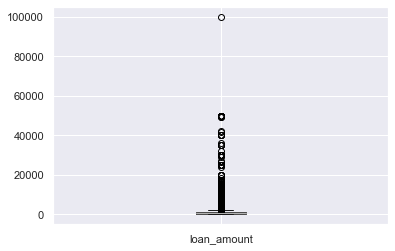

In [37]:
print(loan_file_df.loan_amount.head())
print(loan_file_df.loan_amount.describe())
loan_file_df.boxplot(column=['loan_amount'])
plt.show()

2     150.0
6     200.0
7     400.0
8     475.0
12    400.0
Name: funded_amount, dtype: float64
count    423092.000000
mean        849.502295
std        1134.722871
min          25.000000
25%         300.000000
50%         500.000000
75%        1000.000000
max      100000.000000
Name: funded_amount, dtype: float64


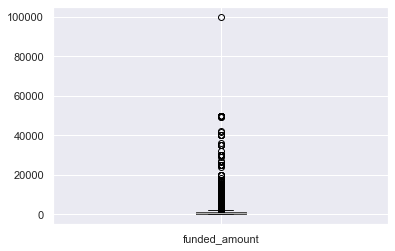

In [38]:
print(loan_file_df.funded_amount.head())
print(loan_file_df.funded_amount.describe())
loan_file_df.boxplot(column=['funded_amount'])
plt.show()

2     43.0
6     43.0
7     14.0
8     14.0
12    14.0
Name: term_in_months, dtype: float64
count    423092.000000
mean         14.182970
std           8.628724
min           2.000000
25%           8.000000
50%          14.000000
75%          14.000000
max         158.000000
Name: term_in_months, dtype: float64


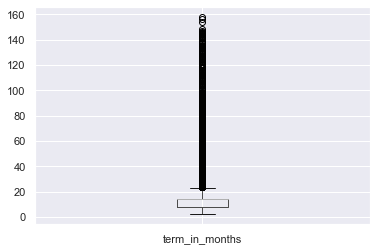

In [39]:
print(loan_file_df.term_in_months.head())
print(loan_file_df.term_in_months.describe())
loan_file_df.boxplot(column=['term_in_months'])
plt.show()

Index(['LocationName', 'ISO', 'country', 'region', 'world_region', 'MPI',
       'geo', 'lat', 'lon'],
      dtype='object')
0    0.387
1    0.466
2    0.300
3    0.301
4    0.325
Name: MPI, dtype: float64
count    984.000000
mean       0.211330
std        0.183621
min        0.000000
25%        0.053000
50%        0.155000
75%        0.341500
max        0.744000
Name: MPI, dtype: float64


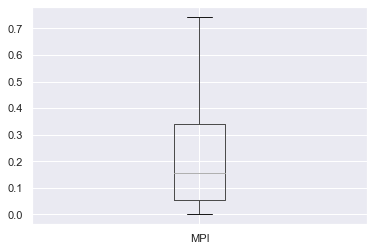

In [40]:
print(mpi_region_location_file_df.columns)
print(mpi_region_location_file_df.MPI.head())
print(mpi_region_location_file_df.MPI.describe())
mpi_region_location_file_df.boxplot(column=['MPI'])
plt.show()

In [41]:
#####Exploratory Data Analysis

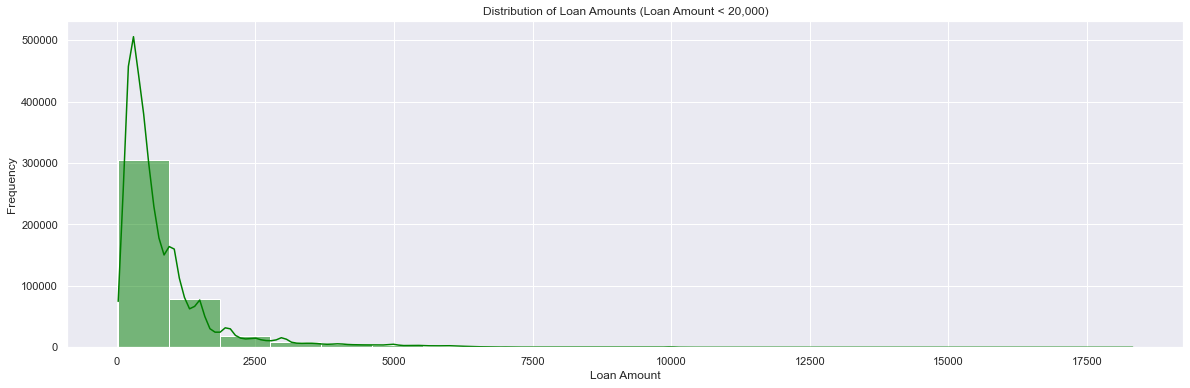

In [42]:
# Filter the dataset where loan amount is less than 20,000
filtered_data = loan_file_df[loan_file_df['loan_amount'] < 20000]

# Visualize the distribution of loan amount
plt.figure(figsize=(20, 6))
sns.histplot(x='loan_amount', data=filtered_data, color='green', bins=20, kde=True)
plt.title('Distribution of Loan Amounts (Loan Amount < 20,000)')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

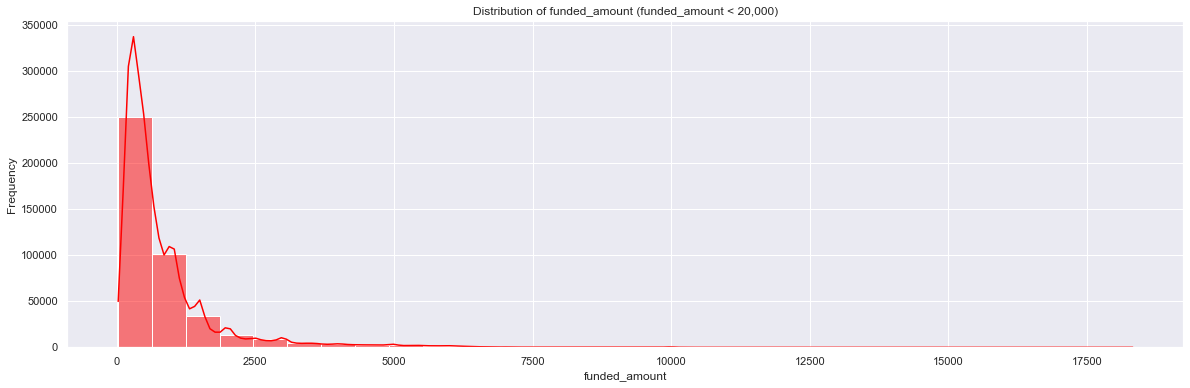

In [43]:
# Distribution of funded amount
# Filter the dataset where loan amount is less than 20,000
filtered_data = loan_file_df[loan_file_df['funded_amount'] < 20000]

plt.figure(figsize=(20, 6))
sns.histplot(x='funded_amount', data=filtered_data, color='red', bins=30, kde=True)
plt.title('Distribution of funded_amount (funded_amount < 20,000)')
plt.xlabel('funded_amount')
plt.ylabel('Frequency')
plt.show()

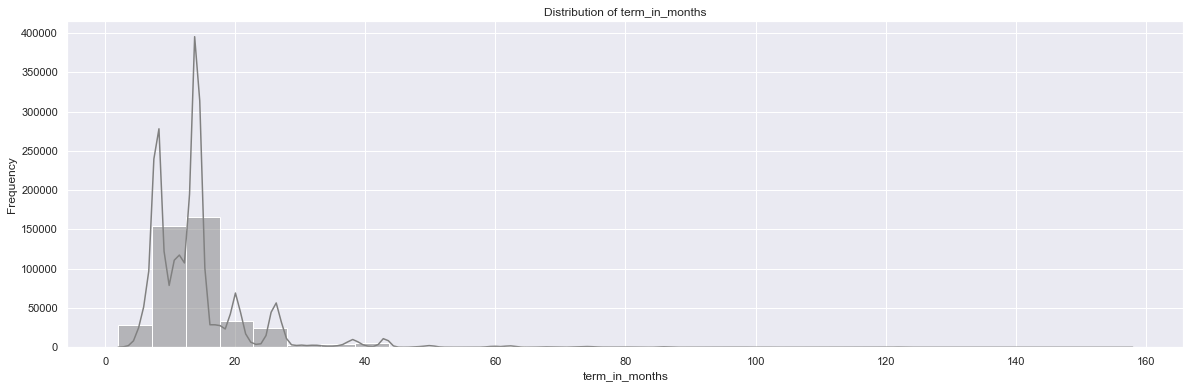

In [44]:
# Distribution of term_in_months
plt.figure(figsize=(20, 6))
sns.histplot(x='term_in_months', data=loan_file_df, color='grey', bins=30, kde=True)
plt.title('Distribution of term_in_months')
plt.xlabel('term_in_months')
plt.ylabel('Frequency')
plt.show()

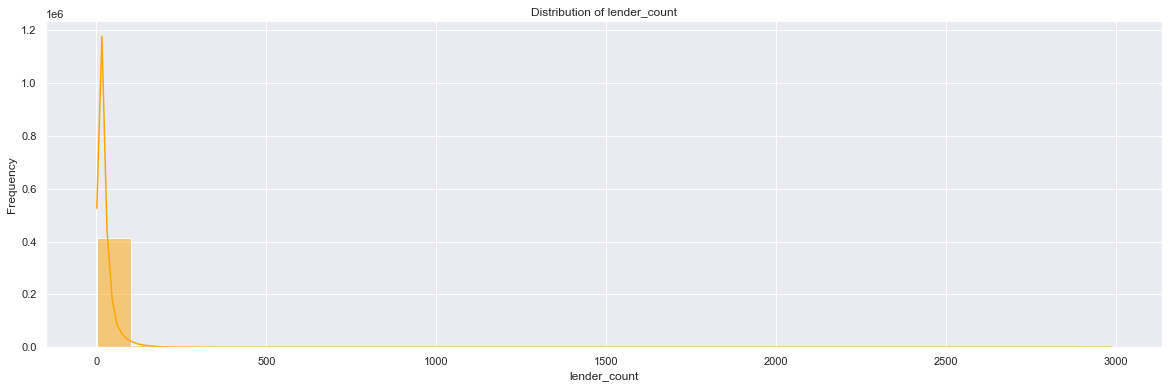

In [45]:
# Distribution of lender_count
plt.figure(figsize=(20, 6))
sns.histplot(x='lender_count', data=loan_file_df, color='orange', bins=30, kde=True)
plt.title('Distribution of lender_count')
plt.xlabel('lender_count')
plt.ylabel('Frequency')
plt.show()

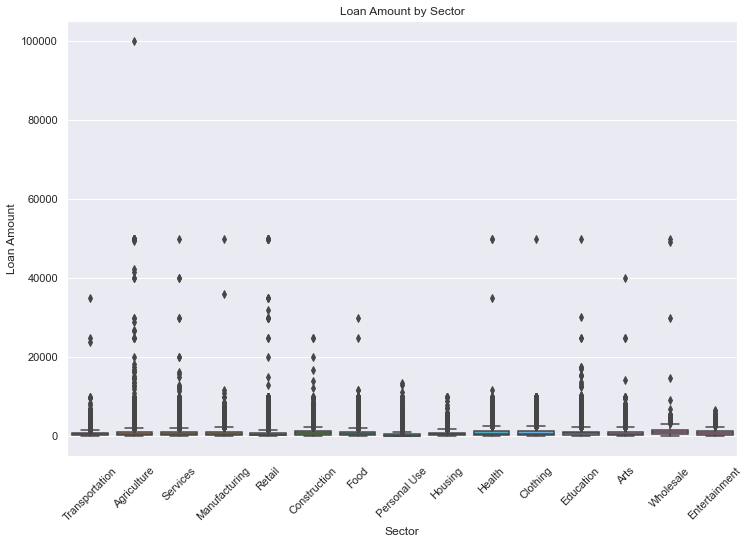

In [46]:
# Boxplot of loan amount by sector
plt.figure(figsize=(12, 8))
sns.boxplot(x='sector', y='loan_amount', data=loan_file_df)
plt.title('Loan Amount by Sector')
plt.xlabel('Sector')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()

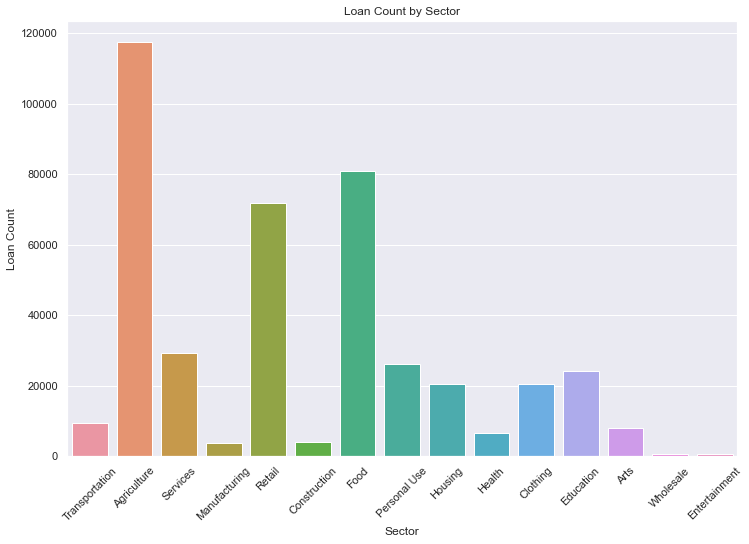

In [47]:
# Bar plot of loan count by sector
plt.figure(figsize=(12, 8))
sns.countplot(x='sector', data=loan_file_df)
plt.title('Loan Count by Sector')
plt.xlabel('Sector')
plt.ylabel('Loan Count')
plt.xticks(rotation=45)
plt.show()

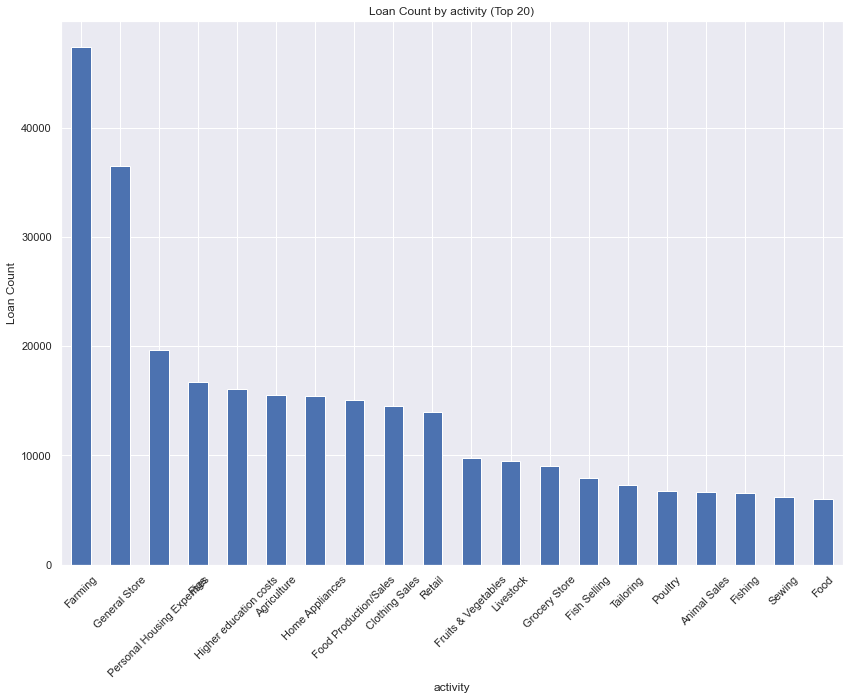

In [48]:
# Bar plot of loan count by activity
loan_count_by_activity = loan_file_df['activity'].value_counts().head(20)

# Plot bar chart for top 10 sectors
plt.figure(figsize=(14, 10))
loan_count_by_sector.plot(kind='bar')
plt.title('Loan Count by activity (Top 20)')
plt.xlabel('activity')
plt.ylabel('Loan Count')
plt.xticks(rotation=45)
plt.show()

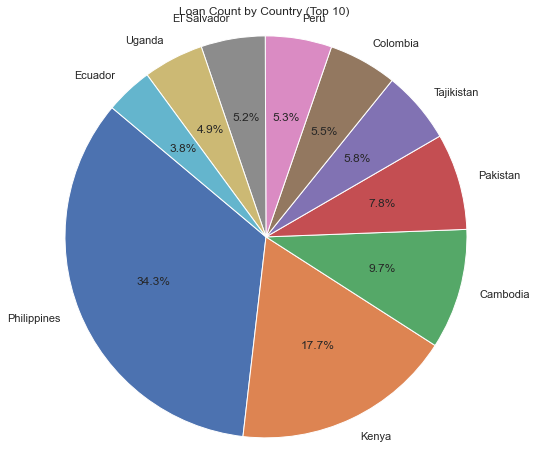

In [49]:
# Pie chart of loan count by country
loan_count_by_country = loan_file_df['country'].value_counts().head(10)

# Plot pie chart for top 10 countries
plt.figure(figsize=(8, 8))
plt.pie(loan_count_by_country, labels=loan_count_by_country.index, autopct='%1.1f%%', startangle=140)
plt.title('Loan Count by Country (Top 10)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

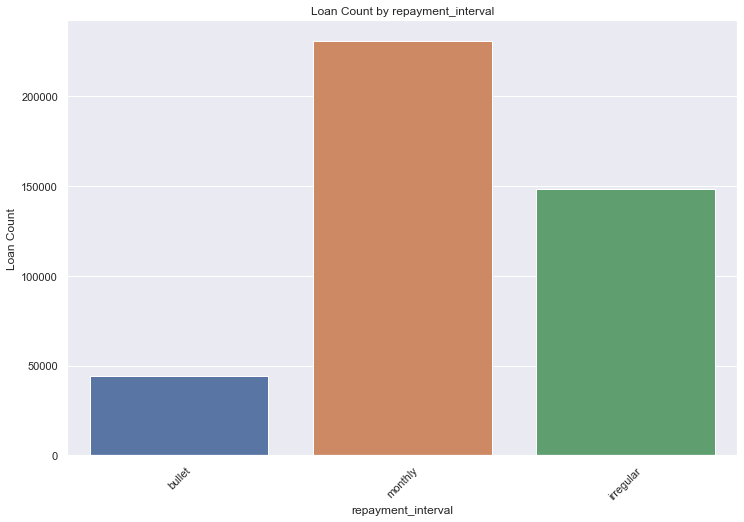

In [50]:
# Bar plot of loan count by repayment_interval
plt.figure(figsize=(12, 8))
sns.countplot(x='repayment_interval', data=loan_file_df)
plt.title('Loan Count by repayment_interval')
plt.xlabel('repayment_interval')
plt.ylabel('Loan Count')
plt.xticks(rotation=45)
plt.show()

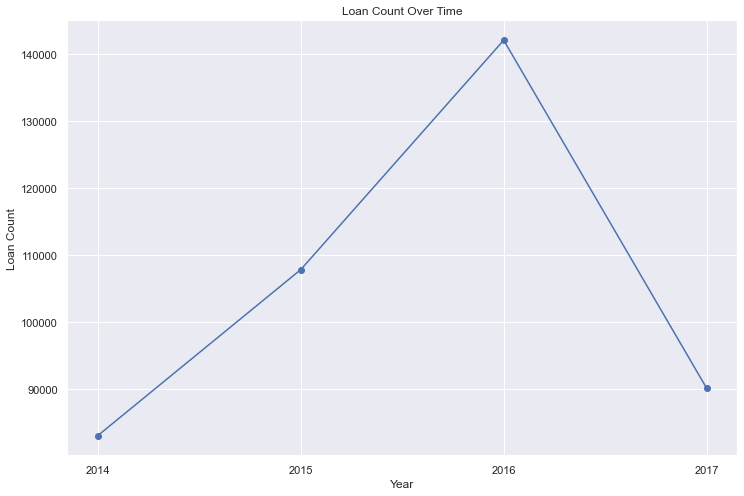

In [51]:
# Extract year from posted date
loan_file_df['posted_year'] = pd.to_datetime(loan_file_df['posted_time']).dt.year

# Line plot of loan count over time
plt.figure(figsize=(12, 8))
loan_count_by_year = loan_file_df.groupby('posted_year').size()
loan_count_by_year.plot(marker='o')
plt.title('Loan Count Over Time')
plt.xlabel('Year')
plt.ylabel('Loan Count')
plt.xticks(loan_count_by_year.index)
plt.grid(True)
plt.show()

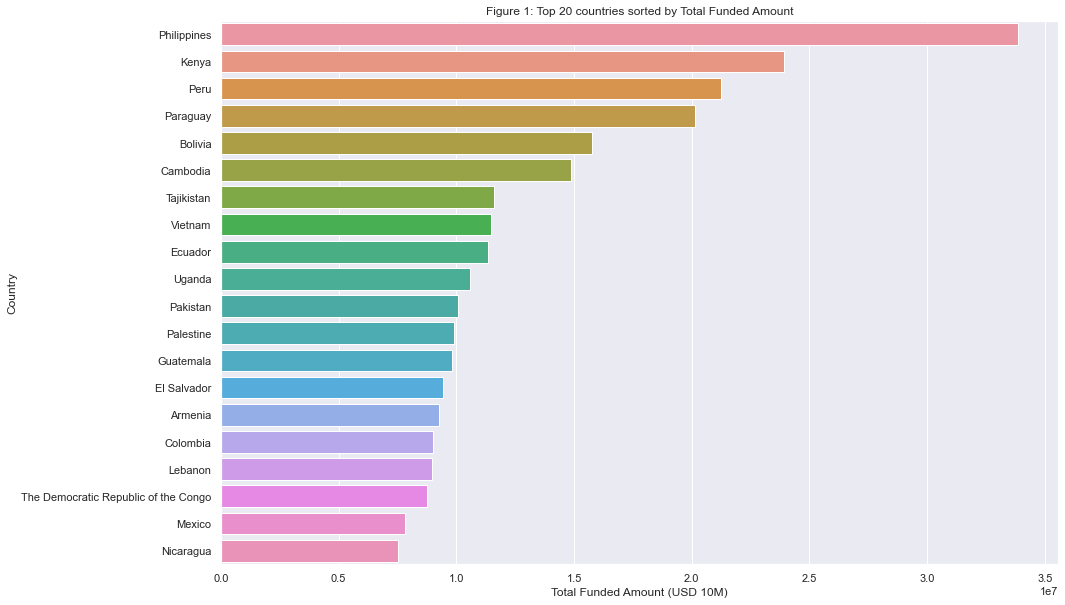

In [52]:
#Apparently loans have different distributions in different countries. Figure 1 shows the top K(=20) countries with largest total amount of funded loans.
plt.figure(figsize=(15,10))
topK = 20
loan_amount_country = loan_file_df.groupby('country').sum()['funded_amount'].sort_values(ascending=False)
sns.barplot(y = loan_amount_country.head(topK).index, x=loan_amount_country.head(topK));
plt.ylabel('Country')
plt.xlabel('Total Funded Amount (USD 10M)')
titleid += 1
plt.title(f'Figure {titleid}: Top {topK} countries sorted by Total Funded Amount');

In [53]:
##From the Figure-11 we can see that Phillipines and Kenya are the top funded countries. This corroborates Kiva.org's real life funding operations, that occure majoratarily in these countries. The top countries also seem to be largely developing countries.

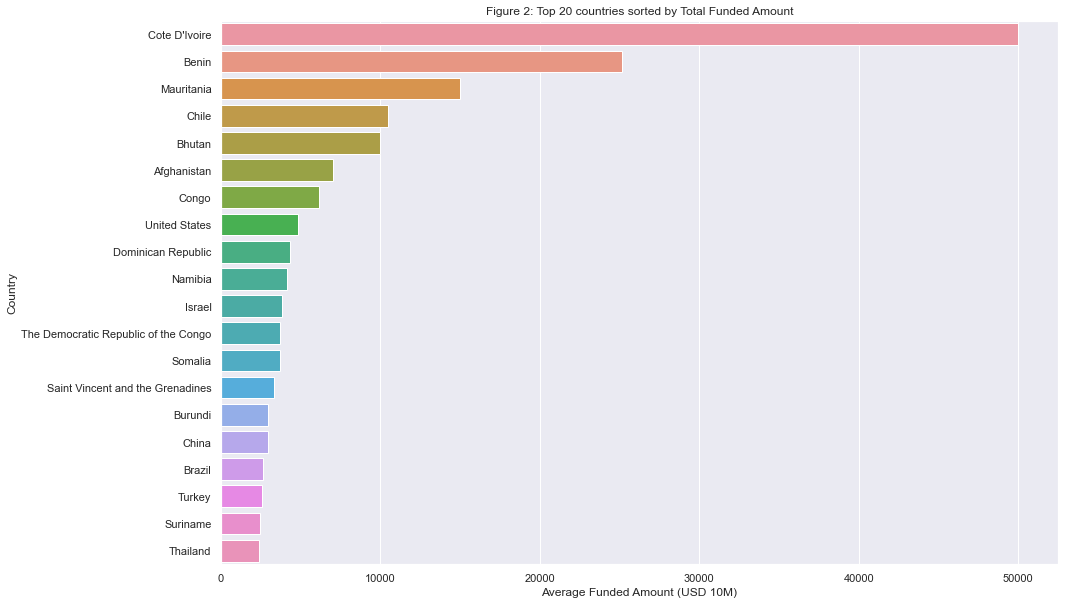

In [54]:
##Figure shows the average amount of funded loans by country.
plt.figure(figsize=(15,10))
loan_amount_country = loan_file_df.groupby('country').mean()['funded_amount'].sort_values(ascending=False)
sns.barplot(y = loan_amount_country.head(topK).index, x=loan_amount_country.head(topK));

plt.ylabel('Country')
plt.xlabel('Average Funded Amount (USD 10M)')
titleid += 1
plt.title(f'Figure {titleid}: Top {topK} countries sorted by Total Funded Amount');

In [55]:
#From the above figure-12 

In [56]:
##Cote D'Ivoire has extremely high average amount of funded loans.

In [57]:
loan_file_df.query(r'country == "Cote D\'Ivoire"')

id  funded_amount  loan_amount     activity       sector  \
631904  1294308        50000.0      50000.0  Agriculture  Agriculture   

                                                      use country_code  \
631904  double cashew nut export output and hire about...           CI   

              country region currency  ...                posted_time  \
631904  Cote D'Ivoire  Kolia      USD  ...  2017-05-08 17:04:17+00:00   

                   disbursed_time                funded_time term_in_months  \
631904  2017-04-08 07:00:00+00:00  2017-05-18 05:06:35+00:00           10.0   

        lender_count                                               tags  \
631904          1706  user_favorite, user_favorite, #Vegan, #Job Cre...   

       borrower_genders repayment_interval        date posted_year  
631904           female          irregular  2017-05-08        2017  

[1 rows x 21 columns]

In [58]:
##There is only one record, thus we redo the last plot by eliminating countries with less than 5 records.

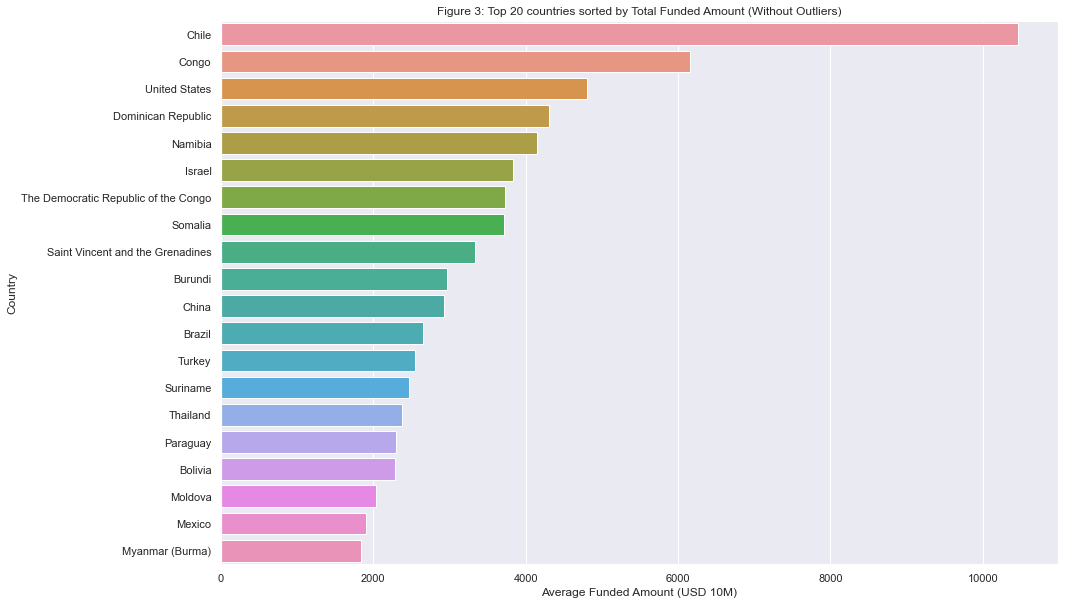

In [59]:
##Figure shows the result.
plt.figure(figsize=(15,10))
useful_countries = list(loan_file_df.groupby('country').count().query('id >= 5').index)
loan_amount_country = loan_file_df.groupby('country').mean()['funded_amount'][useful_countries].sort_values(ascending=False)
sns.barplot(y = loan_amount_country.head(topK).index, x=loan_amount_country.head(topK));

plt.ylabel('Country')
plt.xlabel('Average Funded Amount (USD 10M)')
titleid += 1
plt.title(f'Figure {titleid}: Top {topK} countries sorted by Total Funded Amount (Without Outliers)');

In [60]:
#We would like to see if the average amount of funded loans is related to the poverty level in these countries.

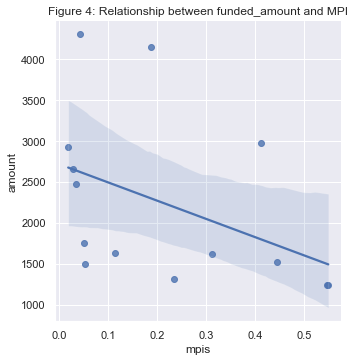

In [61]:
#Figure shows the points of amount of funded loands and MPIs, with the linear regression result.
topK = 40
mpis_country = mpi_region_location_file_df.groupby('country').mean()['MPI'].dropna()
countries = loan_amount_country.head(topK)
common_countries = mpis_country.index.intersection(countries.index)
df = pd.DataFrame({'mpis': mpis_country[common_countries], 'amount': countries[common_countries]} )
sns.lmplot(x='mpis', y='amount', data=df)
titleid += 1
plt.title(f'Figure {titleid}: Relationship between funded_amount and MPI');

In [62]:
##In general, countries with higher MPI tend to have lower average amounts of loans.
##The relationship is not linear though.

In [63]:
# How the loan is funded across geographical location overa period of time? 

In [64]:
# Let's take the top 20 countries with total amount of funding
top_countries_list = list(loan_file_df.groupby('country').sum()['funded_amount'].sort_values(ascending=False).head(10).index)
top_country_loans = loan_file_df.query(f'country in {top_countries_list}').copy()
top_country_loans.head()

id  funded_amount  loan_amount                   activity  \
46  653185          250.0        250.0        Fruits & Vegetables   
53  653432          550.0        550.0          Personal Expenses   
57  653237          250.0        250.0            Cosmetics Sales   
58  653229          250.0        250.0                  Tailoring   
62  653290         4275.0       4275.0  Personal Housing Expenses   

          sector                                                use  \
46          Food  to purchase sacks of tomatoes, potatoes, fruit...   
53  Personal Use  to buy a cradle and household items for his yo...   
57        Retail  to purchase body lotions, hair oil, jewelery, ...   
58      Services  to purchase cloth materials and sewing thread ...   
62       Housing  to pay for the construction of a hygienic toil...   

   country_code  country     region currency  ...                posted_time  \
46           KE    Kenya        Voi      KES  ...  2014-01-02 06:59:33+00:00   
53           PE     Peru        Ica      PEN  ...  2014-01-02 23:36:30+00:00   
57           KE    Kenya     Likoni      KES  ...  2014-01-02 08:58:55+00:00   
58           KE    Kenya     Likoni      KES  ...  2014-01-02 08:43:29+00:00   
62           VN  Vietnam  Hai Duong      VND  ...  2014-01-02 11:12:43+00:00   

               disbursed_time                funded_time term_in_months  \
46  2013-12-12 08:00:00+00:00  2014-01-02 18:40:01+00:00           13.0   
53  2013-12-20 08:00:00+00:00  2014-01-22 15:55:47+00:00           14.0   
57  2013-12-09 08:00:00+00:00  2014-01-05 07:33:21+00:00           14.0   
58  2013-12-09 08:00:00+00:00  2014-01-02 21:56:07+00:00           14.0   
62  2014-01-27 08:00:00+00:00  2014-01-11 05:20:41+00:00           14.0   

    lender_count                                               tags  \
46             7                                             #Vegan   
53            20                             #Parent, user_favorite   
57             3                                     volunteer_pick   
58             1                         #First Loan, user_favorite   
62           144  user_favorite, #Low-profit FP, #Post-disbursed...   

                                     borrower_genders repayment_interval  \
46                                             female          irregular   
53                                               male            monthly   
57                                             female          irregular   
58                                             female          irregular   
62  female, female, female, female, female, female...             bullet   

          date posted_year  
46  2014-01-02        2014  
53  2014-01-02        2014  
57  2014-01-02        2014  
58  2014-01-02        2014  
62  2014-01-02        2014  

[5 rows x 21 columns]

In [65]:
import datetime
top_country_loans.loc[:, 'posted_time'] = pd.to_datetime(top_country_loans.posted_time)
## Lets add the year column separately to track growth over time.
## Parse datetime and set the day to the 1st of every month and club amounts together for easier plotting
top_country_loans.loc[:, 'posted_month_year'] = top_country_loans.posted_time.apply(lambda x: datetime.datetime(x.year, x.month, 1)) 

top_country_loan_file_df = top_country_loans.groupby(['posted_month_year', 'country']).sum()['funded_amount'].reset_index().sort_values(by='posted_month_year')
top_country_loan_file_df

posted_month_year      country  funded_amount
0          2014-01-01      Bolivia       332825.0
1          2014-01-01     Cambodia       171200.0
2          2014-01-01      Ecuador       240925.0
3          2014-01-01        Kenya       254325.0
4          2014-01-01     Paraguay       201300.0
..                ...          ...            ...
424        2017-07-01     Paraguay       130050.0
425        2017-07-01         Peru        14250.0
426        2017-07-01  Philippines        71950.0
427        2017-07-01   Tajikistan        15800.0
429        2017-07-01      Vietnam        14225.0

[430 rows x 3 columns]

In [66]:
fig = go.Figure()

for index, country in enumerate(top_country_loan_file_df.country.unique()):
  query = f"country == '{country}'"
  fig.add_trace(
      go.Scatter(
          y=top_country_loan_file_df.query(query)['funded_amount'], 
          x=top_country_loan_file_df.query(query)['posted_month_year'], 
          text=country,
          mode='lines',
          name=country,
          visible="legendonly" if index <= 4 else True
      )
  )

fig.update_layout(
      width=1200,
      height=1000,
      autosize=True,
      template="plotly_white",
  )

titleid += 1
fig.update_layout(
    title=f"Figure {titleid}: Funded Amount in top 10 countries over time",
    xaxis_rangeslider_visible=True,
    xaxis_title="Year",
    yaxis_title="Loan Amount in USD"
)

fig.show()

In [67]:
#According to above Figure, Kenya seems to have shown high growth in the amount that was funded in the first few months of launch.
#An odd occurence is that we see a sudden downward spike in July 2017 for all countries, let's check what these values are.

In [68]:
top_country_loans[top_country_loans.posted_time.dt.year == 2017][top_country_loans.posted_time.dt.month == 7]

C:\Users\KK\AppData\Local\Temp\ipykernel_13656\3545294745.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



id  funded_amount  loan_amount                   activity  \
667499  1331165         3025.0       3025.0        Fruits & Vegetables   
667500  1331192         2675.0       2675.0                     Retail   
667504  1331202          175.0        175.0              General Store   
667505  1331267          800.0        800.0          Personal Expenses   
667506  1331162         2900.0       2900.0      Food Production/Sales   
...         ...            ...          ...                        ...   
671107  1338832          350.0        350.0  Personal Medical Expenses   
671110  1338784         2700.0       2700.0                   Perfumes   
671133  1338878          475.0        475.0     Higher education costs   
671134  1338682         3525.0       3525.0              Grocery Store   
671141  1339713          175.0        175.0                     Sewing   

              sector                                                use  \
667499          Food        to purchase a variety of fruits for resale.   
667500        Retail  to buy drinks, sodas, baked goods, vegetables,...   
667504        Retail  to buy more supplies for the store like  noodl...   
667505  Personal Use  to buy sand, cement, hollow block, deformed ba...   
667506          Food  to purchase vegetables, meats, condiments, bre...   
...              ...                                                ...   
671107        Health  to pay for her husband's operation and hospita...   
671110        Retail   to buy a range of clothing and perfumes to sell.   
671133     Education                          to pay her son's tuition.   
671134          Food  to buy drinks, baked goods, greens, meat, vege...   
671141      Services  to purchase of a digital sewing machine for em...   

       country_code      country              region currency  ...  \
667499           PY     Paraguay           Paraguari      PYG  ...   
667500           PY     Paraguay         Encarnación      PYG  ...   
667504           PH  Philippines       Talibon,Bohol      PHP  ...   
667505           PH  Philippines  Concepcion, Iloilo      PHP  ...   
667506           PY     Paraguay          Villarrica      PYG  ...   
...             ...          ...                 ...      ...  ...   
671107           TJ   Tajikistan              Isfara      TJS  ...   
671110           PY     Paraguay                 Ita      PYG  ...   
671133           TJ   Tajikistan            Dushanbe      TJS  ...   
671134           PY     Paraguay     Ciudad del Este      PYG  ...   
671141           TJ   Tajikistan            Hamadoni      TJS  ...   

                   disbursed_time                funded_time term_in_months  \
667499  2017-05-30 07:00:00+00:00  2017-07-06 07:21:05+00:00            9.0   
667500  2017-05-30 07:00:00+00:00  2017-07-04 12:08:33+00:00            6.0   
667504  2017-05-31 07:00:00+00:00  2017-07-11 13:36:54+00:00           13.0   
667505  2017-06-01 07:00:00+00:00  2017-07-11 14:14:41+00:00           13.0   
667506  2017-05-30 07:00:00+00:00  2017-07-06 12:05:46+00:00            8.0   
...                           ...                        ...            ...   
671107  2017-07-12 07:00:00+00:00  2017-07-14 16:36:03+00:00           14.0   
671110  2017-06-13 07:00:00+00:00  2017-07-15 20:23:53+00:00            5.0   
671133  2017-07-11 07:00:00+00:00  2017-07-16 04:29:11+00:00           14.0   
671134  2017-06-13 07:00:00+00:00  2017-07-15 17:44:19+00:00            5.0   
671141  2017-07-05 07:00:00+00:00  2017-07-14 19:10:26+00:00           14.0   

       lender_count                                               tags  \
667499           41                                   #Woman Owned Biz   
667500           11                                      user_favorite   
667504            5                         #Woman Owned Biz, #Elderly   
667505            7         #Job Creator, user_favorite, user_favorite   
667506           31  user_favorite, #Parent, #Woman Owned Biz, 

In [69]:
#How large is a loan based on a sector? Do certain sectors get higher loans? Does the sector prefernce changes based on the region? 

In [70]:
sector_loans = loan_file_df.groupby('sector').sum()[['funded_amount', 'loan_amount']].reset_index()
sector_loans

sector  funded_amount  loan_amount
0      Agriculture     98114900.0   98114900.0
1             Arts      8569950.0    8569950.0
2         Clothing     23354150.0   23354150.0
3     Construction      4412350.0    4412350.0
4        Education     24681875.0   24681875.0
5    Entertainment       514950.0     514950.0
6             Food     71769250.0   71769250.0
7           Health      6863575.0    6863575.0
8          Housing     14686775.0   14686775.0
9    Manufacturing      3847875.0    3847875.0
10    Personal Use     11035500.0   11035500.0
11          Retail     56464275.0   56464275.0
12        Services     27572525.0   27572525.0
13  Transportation      6784175.0    6784175.0
14       Wholesale       745500.0     745500.0

In [71]:
from plotly.subplots import make_subplots

fig = go.Figure(data=[go.Pie(labels=sector_loans.sector, values=sector_loans.funded_amount)])
    
titleid += 1
fig.update_layout(dict(
    title=f'Figure {titleid}: Funded Loan Amount per Sector',
    width=800,
    height=800
))

fig.show()

In [72]:
#From Figure 6 we see that Agriculture, Food and Retails are the largest sectors that get funded on Kiva.org. Let's see if these sectors are different across countries.

In [73]:
top_country_sector_loans = top_country_loans.groupby(['sector', 'country']).sum()['funded_amount'].reset_index()
top_country_sector_loans

sector      country  funded_amount
0    Agriculture      Bolivia      1822075.0
1    Agriculture     Cambodia      7006250.0
2    Agriculture      Ecuador      4148450.0
3    Agriculture        Kenya     12900975.0
4    Agriculture     Paraguay      1211475.0
..           ...          ...            ...
145    Wholesale         Peru        45200.0
146    Wholesale  Philippines        29750.0
147    Wholesale   Tajikistan         2000.0
148    Wholesale       Uganda        86575.0
149    Wholesale      Vietnam        10650.0

[150 rows x 3 columns]

In [74]:
fig = go.Figure(
    data=[
          go.Pie(
              labels=top_country_sector_loans.query("country == 'Paraguay'").sector, 
              values=top_country_sector_loans.query("country == 'Paraguay'").funded_amount
              )
          ]
        )

titleid += 1  
fig.update_layout(dict(
    title=f'Figure {titleid}: Funded Loan Amount per Sector',
    width=800,
    height=800
))

fig.update_layout(
    updatemenus=[
        go.layout.Updatemenu(
            buttons=list([
                dict(
                    args=[
                        {
                            "labels": [top_country_sector_loans.query(f"country == '{country}'").sector], 
                            "values": [top_country_sector_loans.query(f"country == '{country}'").funded_amount],
                            "title": [
                                f'Funded Loan Amount per Sector for {country}'
                            ]
                        }],
                    label=country,
                    method="restyle"
                ) for country in list(top_country_sector_loans.country.unique())
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.8,
            yanchor="top"
        ),
    ]
)

fig.show()

In [75]:
#From Figure 7 we see that most developing nations have Agriculture, Retail and Food as the most funded sectors. Thus, the sector can be a good indicator of predicting the likelihood of getting a microloan and/or the funded amount of the loan.

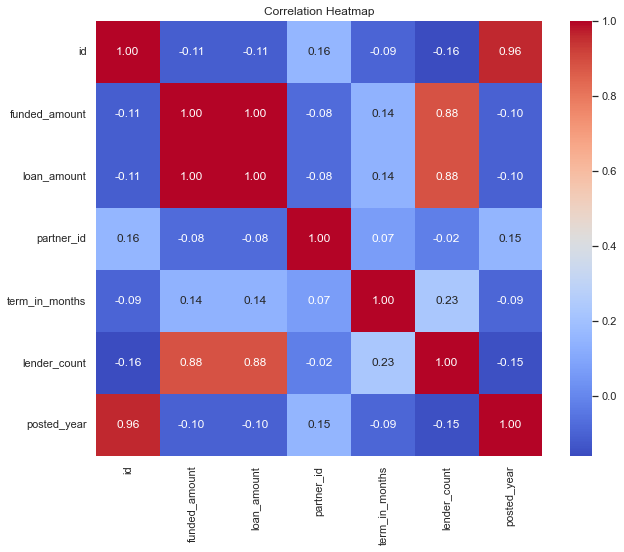

In [76]:
# Correlation heatmap to identify relationships between variables
correlation_matrix = loan_file_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [77]:
#What is the percentage of irregular payments in countries, and how is it correlated to sector, country, activity and loan amount?

In [78]:
#Here we seek to analyze the distribution of irregular payments. Certain parameters like country, activity, sector and loan amount will help us understand the likelihood of getting a loan based on whether the loan payment type is irregular.

#In later sections, we classify a loan's payment type (regular, irregular) based on these parameters. Before classifying we analyze if there's sufficient distribution of irregular payment types across these parameters.

In [79]:
loan_file_df.query("repayment_interval == 'irregular'").head(2)

id  funded_amount  loan_amount                 activity  sector  \
35  653047         2225.0       2225.0  Personal Products Sales  Retail   
46  653185          250.0        250.0      Fruits & Vegetables    Food   

                                                  use country_code   country  \
35                          to buy hair oils to sell.           PK  Pakistan   
46  to purchase sacks of tomatoes, potatoes, fruit...           KE     Kenya   

    region currency  ...                posted_time  \
35  Lahore      PKR  ...  2014-01-01 04:49:26+00:00   
46     Voi      KES  ...  2014-01-02 06:59:33+00:00   

               disbursed_time                funded_time term_in_months  \
35  2013-12-17 08:00:00+00:00  2014-01-19 16:39:37+00:00           11.0   
46  2013-12-12 08:00:00+00:00  2014-01-02 18:40:01+00:00           13.0   

    lender_count                                      tags  \
35            58  #Parent, #Repeat Borrower, user_favorite   
46             7                                    #Vegan   

                                     borrower_genders repayment_interval  \
35  female, female, female, female, female, female...          irregular   
46                                             female          irregular   

          date posted_year  
35  2014-01-01        2014  
46  2014-01-02        2014  

[2 rows x 21 columns]

In [80]:
repayment_data = loan_file_df.groupby(['repayment_interval', 'country', 'sector', 'activity']).sum()['funded_amount'].reset_index()
repayment_data

repayment_interval      country          sector            activity  \
0                bullet  Afghanistan            Arts            Textiles   
1                bullet      Albania     Agriculture         Agriculture   
2                bullet      Albania     Agriculture             Farming   
3                bullet      Albania     Agriculture         Land Rental   
4                bullet      Albania     Agriculture           Livestock   
...                 ...          ...             ...                 ...   
8219            monthly     Zimbabwe        Services     Vehicle Repairs   
8220            monthly     Zimbabwe  Transportation                Taxi   
8221            monthly     Zimbabwe  Transportation      Transportation   
8222            monthly     Zimbabwe       Wholesale  Goods Distribution   
8223            monthly     Zimbabwe       Wholesale           Wholesale   

      funded_amount  
0           14000.0  
1            1625.0  
2           24675.0  
3            1800.0  
4            3275.0  
...             ...  
8219         2550.0  
8220         2000.0  
8221         5250.0  
8222        10600.0  
8223         5300.0  

[8224 rows x 5 columns]

In [81]:
fig = go.Figure(
    data=go.Splom(
        dimensions=[
                    dict(
                        label=label,
                         values=list(repayment_data[label])
                        ) for label in list(repayment_data.columns)
                    ]
))

titleid += 1
fig.update_layout(
    title=f'Figure {titleid}: Loan Repayment Interval',
    dragmode='select',
    width=1200,
    height=1200,
    hovermode='closest',
)

fig.show()

In [82]:
#In the above , we see at the top right graph an interesting correlation between funded_amount and repayment_interval. Let's see this graph up close per sector and per country.

In [83]:
# for col in list(repayment_data.iloc[:, 1:].columns:
payment_interval_dist = repayment_data.groupby(['country', 'repayment_interval']).count()['sector'].reset_index()
payment_interval_dist

country repayment_interval  sector
0    Afghanistan             bullet       1
1        Albania             bullet       6
2        Albania          irregular       8
3        Albania            monthly      81
4        Armenia             bullet       8
..           ...                ...     ...
187       Zambia          irregular      13
188       Zambia            monthly      19
189     Zimbabwe             bullet       1
190     Zimbabwe          irregular      70
191     Zimbabwe            monthly      93

[192 rows x 3 columns]

In [84]:
fig = go.Figure(
    data=[
          go.Pie(
              labels=payment_interval_dist.repayment_interval, 
              values=payment_interval_dist.sector
              )
          ]
        )
    
titleid += 1
fig.update_layout(dict(
    title=f'Figure {titleid}: Distribution of Repayment Intervals for Each Country',
    width=800,
    height=800
))

fig.update_layout(
    updatemenus=[
        go.layout.Updatemenu(
            buttons=list([
                dict(
                    args=[
                        {
                            "labels": [payment_interval_dist.query(f'country == "{country}"').repayment_interval], 
                            "values": [payment_interval_dist.query(f'country == "{country}"').sector],
                            "title": [
                                f'Funded Loan Amount per Repayment Interval for {country}'
                            ]
                        }],
                    label=country,
                    method="restyle"
                ) for country in list(payment_interval_dist.country.unique())
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.8,
            yanchor="top"
        ),
    ]
)

fig.show()

In [85]:
#From Figure 9 we see that countries such as Rwanda has a majority of loans under irregular repayment intervals. We will investigate during Principal Component Analysis (PCA) to see if repayment_interval plays a role in deciding the funded_amount.

In [86]:
# for col in list(repayment_data.iloc[:, 1:].columns:
payment_interval_dist_sector = repayment_data.groupby(['sector', 'repayment_interval']).count()['country'].reset_index()
payment_interval_dist_sector.head(10)

sector repayment_interval  country
0   Agriculture             bullet      182
1   Agriculture          irregular      319
2   Agriculture            monthly      485
3          Arts             bullet       62
4          Arts          irregular      113
5          Arts            monthly      199
6      Clothing             bullet       23
7      Clothing          irregular      119
8      Clothing            monthly      181
9  Construction             bullet       28

In [87]:
fig = go.Figure(
    data=[
          go.Pie(
              labels=payment_interval_dist_sector.repayment_interval, 
              values=payment_interval_dist_sector.country
              )
          ]
        )
    
titleid += 1
fig.update_layout(dict(
    title=f'Figure {titleid}: Distribution of Repayment Intervals for Each Sector',
    width=800,
    height=800
))

fig.update_layout(
    updatemenus=[
        go.layout.Updatemenu(
            buttons=list([
                dict(
                    args=[
                        {
                            "labels": [payment_interval_dist_sector.query(f'sector == "{sector}"').repayment_interval], 
                            "values": [payment_interval_dist_sector.query(f'sector == "{sector}"').country],
                            "title": [
                                f'Funded Loan Amount per Repayment Interval Type for {sector}'
                            ]
                        }],
                    label=sector,
                    method="restyle"
                ) for sector in list(payment_interval_dist_sector.sector.unique())
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.8,
            yanchor="top"
        ),
    ]
)

fig.show()

In [88]:
#From Figure 10 we see that most sectors have a majority repayment interval under monthly payments. This is surprising even for sectors like Agriculture where a microloan would be expected to be paid after a long time, or paid irregularly due to the seasonal aspect of Agriculture, especially in developing countries.

In [89]:
gender = loan_file_df.groupby(['borrower_genders']).size().sort_values(ascending=False).reset_index(name='count').head(20)
gender

borrower_genders   count
0                                              female  263426
1                                                male   84201
2                              female, female, female    8645
3                                      female, female    8536
4                      female, female, female, female    6725
5              female, female, female, female, female    5465
6      female, female, female, female, female, female    1687
7   female, female, female, female, female, female...    1462
8   female, female, female, female, female, female...    1451
9   female, female, female, female, female, female...    1443
10                                       male, female    1101
11                                       female, male    1095
12  female, female, female, female, female, female...     985
13  female, female, female, female, female, female...     904
14  female, female, female, female, female, female...     855
15                                         male, male     737
16                               male, female, female     682
17                               female, female, male     659
18                               female, male, female     651
19  female, female, female, female, female, female...     586

In [90]:
# Bar plot of loan count by borrower_genders
#plt.figure(figsize=(12, 8))
#sns.countplot(x='borrower_genders', data=loan_file_df)
#plt.title('Loan Count by borrower_genders')
#plt.xlabel('borrower_genders')
#plt.ylabel('Loan Count')
#plt.xticks(rotation=45)
#plt.show()

In [91]:
# Handle missing values in the 'borrower_genders' column
loan_file_df['borrower_genders'] = loan_file_df['borrower_genders'].fillna('')  # Replace NaN with empty string

# Remove duplicate gender values
loan_file_df['borrower_genders'] = loan_file_df['borrower_genders'].str.strip()  # Strip leading/trailing spaces
loan_file_df['borrower_genders'] = loan_file_df['borrower_genders'].str.split(',').apply(lambda x: ', '.join(sorted(set(x))))

# Display unique gender values
unique_genders = loan_file_df['borrower_genders'].unique()
print("Unique gender values after removing duplicates:")
print(unique_genders)

Unique gender values after removing duplicates:
['female' ' female, female' ' male, male' 'male' ' female, male'
 ' female,  male, female' ' female,  male, male' ' male, female']


In [92]:
gender = loan_file_df.groupby(['borrower_genders']).size().sort_values(ascending=False).reset_index(name='count').head(20)
gender

borrower_genders   count
0                  female  263426
1                    male   84201
2          female, female   43067
3   female,  male, female   17213
4     female,  male, male    7784
5            female, male    3087
6              male, male    2736
7            male, female    1578

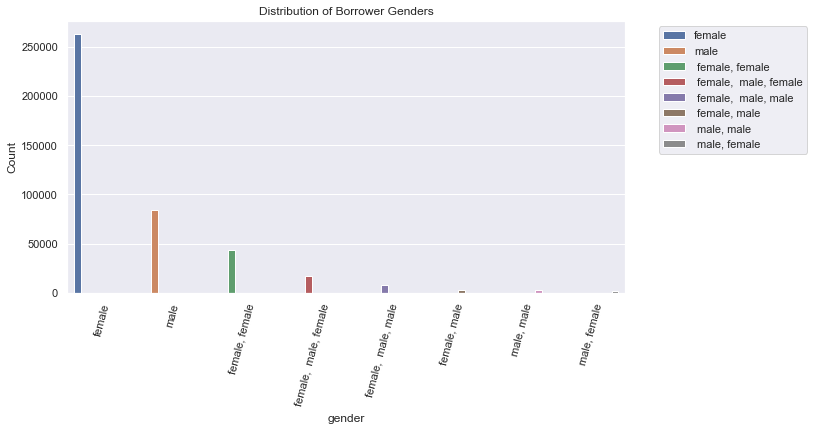

In [93]:
plt.figure(figsize = (10,5))
# Plot bar chart for borrower genders per sectors
sns.barplot(data=gender, x='borrower_genders', y='count', hue='borrower_genders')

# Set the labels and title
plt.xlabel('gender')
plt.ylabel('Count')
plt.title('Distribution of Borrower Genders')
# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation = 75)

# Show the plot
plt.show()

In [94]:
sector_gender = loan_file_df.groupby(['sector','borrower_genders']).size().sort_values(ascending=False).reset_index(name='count').head(20)
sector_gender

sector        borrower_genders  count
0    Agriculture                  female  63435
1           Food                  female  57603
2         Retail                  female  55844
3    Agriculture                    male  30504
4       Services                  female  20201
5        Housing                  female  14547
6      Education                  female  14161
7       Clothing                  female  13972
8    Agriculture          female, female  10567
9           Food          female, female   9526
10     Education                    male   9159
11          Food                    male   8615
12        Retail                    male   7818
13  Personal Use          female, female   7607
14   Agriculture   female,  male, female   6505
15      Services                    male   6115
16  Personal Use                  female   5779
17          Arts                  female   5434
18        Retail          female, female   5358
19  Personal Use                    male   5107

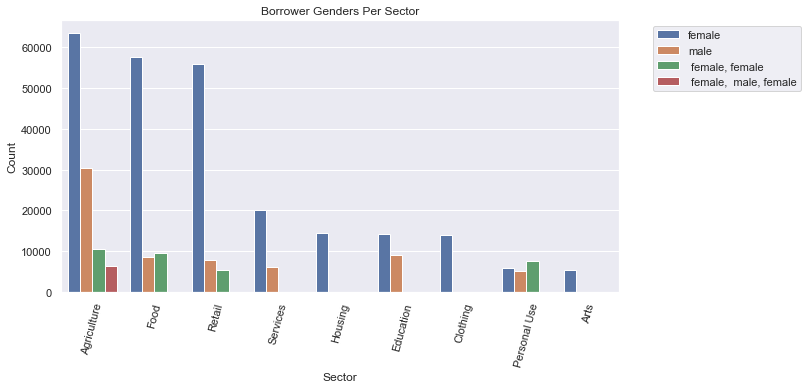

In [95]:
plt.figure(figsize = (10,5))
# Plot bar chart for borrower genders per sectors
sns.barplot(data=sector_gender, x='sector', y='count', hue='borrower_genders')

# Set the labels and title
plt.xlabel('Sector')
plt.ylabel('Count')
plt.title('Borrower Genders Per Sector')
# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation = 75)

# Show the plot
plt.show()

In [96]:
#Prediction and Inference 

In [97]:
loan_file_df.describe()

id  funded_amount    loan_amount     partner_id  \
count  4.230920e+05  423092.000000  423092.000000  423092.000000   
mean   1.023395e+06     849.502295     849.502295     183.993165   
std    1.919688e+05    1134.722871    1134.722871      99.567643   
min    6.530470e+05      25.000000      25.000000       9.000000   
25%    8.660228e+05     300.000000     300.000000     126.000000   
50%    1.037726e+06     500.000000     500.000000     154.000000   
75%    1.194287e+06    1000.000000    1000.000000     222.000000   
max    1.339713e+06  100000.000000  100000.000000     535.000000   

       term_in_months   lender_count    posted_year  
count   423092.000000  423092.000000  423092.000000  
mean        14.182970      23.467858    2015.565600  
std          8.628724      30.706301       1.031597  
min          2.000000       1.000000    2014.000000  
25%          8.000000       9.000000    2015.000000  
50%         14.000000      15.000000    2016.000000  
75%         14.000000      29.000000    2016.000000  
max        158.000000    2986.000000    2017.000000

In [99]:
loan_file_df.head()


id  funded_amount  loan_amount        activity          sector  \
2   653068          150.0        150.0  Transportation  Transportation   
6   653067          200.0        200.0           Dairy     Agriculture   
7   653078          400.0        400.0    Beauty Salon        Services   
8   653082          475.0        475.0   Manufacturing   Manufacturing   
12  653089          400.0        400.0   General Store          Retail   

                                                  use country_code   country  \
2   To repair their old cycle-van and buy another ...           IN     India   
6   To purchase a dairy cow and start a milk produ...           IN     India   
7          to buy more hair and skin care products.             PK  Pakistan   
8   to purchase leather, plastic soles and heels i...           PK  Pakistan   
12            to buy stock of rice, sugar and flour .           PK  Pakistan   

        region currency  ...                posted_time  \
2    Maynaguri      INR  ...  2014-01-01 09:58:07+00:00   
6    Maynaguri      INR  ...  2014-01-01 09:51:02+00:00   
7    Ellahabad      PKR  ...  2014-01-01 11:46:01+00:00   
8       Lahore      PKR  ...  2014-01-01 11:49:43+00:00   
12  Faisalabad      PKR  ...  2014-01-01 12:04:57+00:00   

               disbursed_time                funded_time term_in_months  \
2   2013-12-17 08:00:00+00:00  2014-01-01 16:01:36+00:00           43.0   
6   2013-12-16 08:00:00+00:00  2014-01-01 17:18:09+00:00           43.0   
7   2013-12-20 08:00:00+00:00  2014-01-10 18:18:44+00:00           14.0   
8   2013-12-20 08:00:00+00:00  2014-01-01 18:47:21+00:00           14.0   
12  2013-12-24 08:00:00+00:00  2014-01-08 00:35:14+00:00           14.0   

    lender_count                                tags borrower_genders  \
2              6        user_favorite, user_favorite           female   
6              8        user_favorite, user_favorite           female   
7              8          #Elderly, #Woman Owned Biz           female   
8             19                       user_favorite           female   
12            16  #Repeat Borrower, #Woman Owned Biz           female   

   repayment_interval        date posted_year  
2              bullet  2014-01-01        2014  
6              bullet  2014-01-01        2014  
7             monthly  2014-01-01        2014  
8             monthly  2014-01-01        2014  
12            monthly  2014-01-01        2014  

[5 rows x 21 columns]

In [173]:
Repayment_Interval_map = {'bullet': 1, 'monthly': 1, 'weekly': 1 , 'irregular': 0}
loan_file_df['Repayment_Default'] = loan_file_df['repayment_interval'].replace(Repayment_Interval_map)

In [174]:
# Calculate loan count per country
country_loan_count = loan_file_df['country'].value_counts()

# Get the top 20 countries by loan count
top_20_countries = country_loan_count.head(20).index

# Filter the DataFrame to include only records of the top 20 countries
top_20_loan_file_df = loan_file_df[loan_file_df['country'].isin(top_20_countries)]


new_loan_file_df = top_20_loan_file_df[['sector','country', 'Repayment_Default']].copy()
new_loan_file_df.head()

sector   country  Repayment_Default
2   Transportation     India                  1
6      Agriculture     India                  1
7         Services  Pakistan                  1
8    Manufacturing  Pakistan                  1
12          Retail  Pakistan                  1

In [175]:
kiva_data = pd.get_dummies(new_loan_file_df, columns=['country','sector'])
print(kiva_data.columns)

Index(['Repayment_Default', 'country_Armenia', 'country_Bolivia',
       'country_Cambodia', 'country_Colombia', 'country_Ecuador',
       'country_El Salvador', 'country_Guatemala', 'country_India',
       'country_Kenya', 'country_Lebanon', 'country_Nicaragua',
       'country_Nigeria', 'country_Pakistan', 'country_Palestine',
       'country_Paraguay', 'country_Peru', 'country_Philippines',
       'country_Tajikistan', 'country_Uganda', 'country_Vietnam',
       'sector_Agriculture', 'sector_Arts', 'sector_Clothing',
       'sector_Construction', 'sector_Education', 'sector_Entertainment',
       'sector_Food', 'sector_Health', 'sector_Housing',
       'sector_Manufacturing', 'sector_Personal Use', 'sector_Retail',
       'sector_Services', 'sector_Transportation', 'sector_Wholesale'],
      dtype='object')


In [176]:
# Split the data into features and target variable
X = kiva_data.drop(['Repayment_Default'], axis=1)  # Features
y = kiva_data['Repayment_Default']  # Target variable

y.head()


2     1
6     1
7     1
8     1
12    1
Name: Repayment_Default, dtype: int64

In [177]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [178]:

# Random Forest
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)
y_pred_rf = rf_classifier.predict(X_test_scaled)

In [179]:
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))



Random Forest:
Accuracy: 0.8804433417029432
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.76      0.82     23370
           1       0.88      0.94      0.91     43937

    accuracy                           0.88     67307
   macro avg       0.88      0.85      0.86     67307
weighted avg       0.88      0.88      0.88     67307

Confusion Matrix:
[[17755  5615]
 [ 2432 41505]]


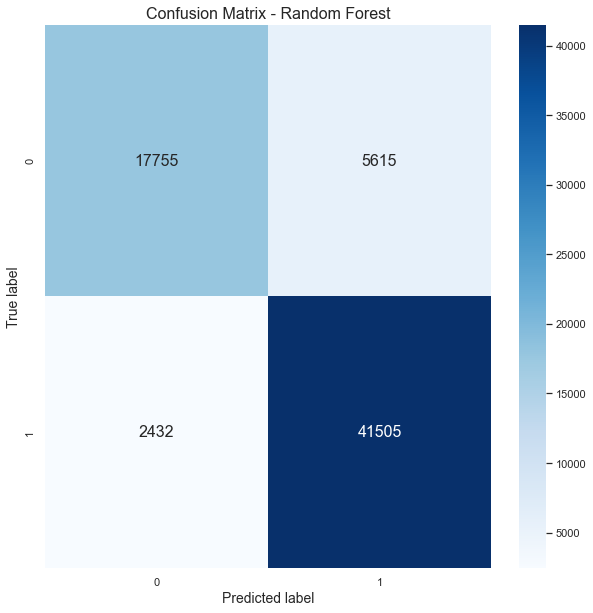

In [181]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)


In [182]:
# Evaluation
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))


Logistic Regression:
Accuracy: 0.8750204287815532
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.73      0.80     23370
           1       0.87      0.95      0.91     43937

    accuracy                           0.88     67307
   macro avg       0.88      0.84      0.86     67307
weighted avg       0.88      0.88      0.87     67307

Confusion Matrix:
[[17074  6296]
 [ 2116 41821]]


In [187]:
# Gradient Boosting
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train_scaled, y_train)
y_pred_gb = gb_classifier.predict(X_test_scaled)

In [188]:
print("\nGradient Boosting:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))


Gradient Boosting:
Accuracy: 0.8791656142748897
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81     23370
           1       0.88      0.95      0.91     43937

    accuracy                           0.88     67307
   macro avg       0.88      0.85      0.86     67307
weighted avg       0.88      0.88      0.88     67307

Confusion Matrix:
[[17560  5810]
 [ 2323 41614]]


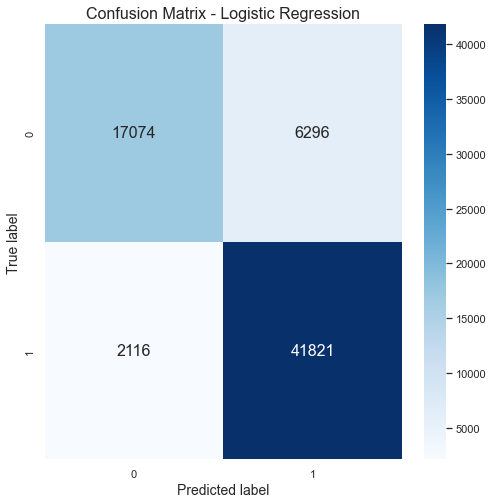

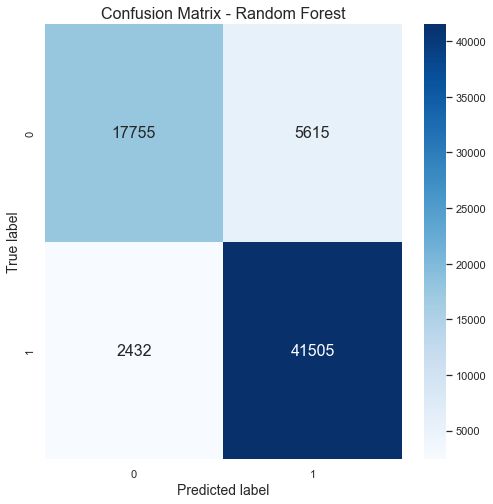

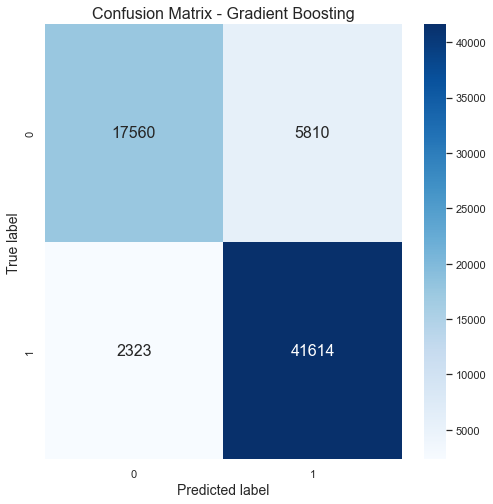

In [189]:
# Define function to plot confusion matrix heatmap
def plot_confusion_matrix(conf_matrix, model_name):
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
    plt.title(f'Confusion Matrix - {model_name}', fontsize=16)
    plt.xlabel('Predicted label', fontsize=14)
    plt.ylabel('True label', fontsize=14)
    plt.show()

# Plot confusion matrix heatmaps for each model
plot_confusion_matrix(confusion_matrix(y_test, y_pred_log_reg), 'Logistic Regression')
plot_confusion_matrix(confusion_matrix(y_test, y_pred_rf), 'Random Forest')
plot_confusion_matrix(confusion_matrix(y_test, y_pred_gb), 'Gradient Boosting')

In [ ]:
new_loan_file_df = loan_file_df[['sector', 'country', 'repayment_interval']].copy()

In [ ]:
# Preprocessing
# Convert categorical variables into dummy variables
#kiva_data_filtered = pd.get_dummies(new_loan_file_df, columns=['sector', 'country', 'repayment_interval'])

kiva_data = pd.get_dummies(kiva_data_filtered, columns=['sector'])
print(kiva_data.columns)

In [172]:
# Split the data into features and target variable
X = kiva_data.drop(['activity'], axis=1)  # Features
y = kiva_data['activity']  # Target variable


KeyError: "['activity'] not found in axis"

In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#print(X_train)

In [ ]:
# Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)
y_pred_rf = rf_classifier.predict(X_test_scaled)

In [171]:
# Evaluate Random Forest model
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf,zero_division=1))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest:
Accuracy: 0.8135112246868825
Classification Report:
              precision    recall  f1-score   support

           1       0.68      0.60      0.64      7116
           2       0.80      0.88      0.84     36821
           4       0.87      0.77      0.82     23370

    accuracy                           0.81     67307
   macro avg       0.79      0.75      0.77     67307
weighted avg       0.81      0.81      0.81     67307

Confusion Matrix:
[[ 4300  2594   222]
 [ 1861 32558  2402]
 [  175  5298 17897]]


In [ ]:
# Define function to plot confusion matrix heatmap
def plot_confusion_matrix(conf_matrix, model_name):
    plt.figure(figsize=(20, 20))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
    plt.title(f'Confusion Matrix - {model_name}', fontsize=16)
    plt.xlabel('Predicted label', fontsize=14)
    plt.ylabel('True label', fontsize=14)
    plt.show()

# Plot confusion matrix heatmaps for each model
#plot_confusion_matrix(confusion_matrix(y_test, y_pred_log_reg), 'Logistic Regression')
plot_confusion_matrix(confusion_matrix(y_test, y_pred_rf), 'Random Forest')
#plot_confusion_matrix(confusion_matrix(y_test, y_pred_gb), 'Gradient Boosting')